In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import missingno as msno
%matplotlib inline

#Exploratory Data Analysis

In [29]:
df = pd.read_csv('/content/drive/MyDrive/Training/final_test.csv')

In [30]:
df.head()

,Unnamed: 0,Q_num,Question,Answer,Focus,Qtype,Rank,URL
0,0,1.0,What causes Noonan syndrome ?,Noonan syndrome is linked to defects in severa...,Noonan syndrome,causes,2-Related,https://www.nlm.nih.gov/medlineplus/ency/artic...
1,1,1.0,What are the complications of Noonan syndrome ?,- Buildup of fluid in tissues of body (lymphed...,Noonan syndrome,complications,2-Related,https://www.nlm.nih.gov/medlineplus/ency/artic...
2,2,1.0,How to prevent Noonan syndrome ?,Couples with a family history of Noonan syndro...,Noonan syndrome,prevention,2-Related,https://www.nlm.nih.gov/medlineplus/ency/artic...
3,3,1.0,What is (are) Noonan syndrome ?,Noonan syndrome is a disease that can be passe...,Noonan syndrome,information,3-Incomplete,https://www.nlm.nih.gov/medlineplus/ency/artic...
4,4,1.0,What causes Noonan syndrome ?,Noonan syndrome is linked to defects in severa...,Noonan syndrome,causes,3-Incomplete,https://www.nlm.nih.gov/medlineplus/ency/artic...


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860 entries, 0 to 859
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  860 non-null    int64  
 1   Q_num       860 non-null    float64
 2   Question    860 non-null    object 
 3   Answer      860 non-null    object 
 4   Focus       857 non-null    object 
 5   Qtype       860 non-null    object 
 6   Rank        860 non-null    object 
 7   URL         860 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 53.9+ KB


In [32]:
df.describe()

,Unnamed: 0,Q_num
count,860.000000,860.000000
mean,429.500000,52.425581
std,248.404911,28.267108
min,0.000000,1.000000
25%,214.750000,31.000000
50%,429.500000,51.000000
75%,644.250000,76.000000
max,859.000000,104.000000


In [33]:
#We'll drop the index column as it is redundant
df.drop(columns=['Unnamed: 0'],inplace=True)
df.head()

,Q_num,Question,Answer,Focus,Qtype,Rank,URL
0,1.0,What causes Noonan syndrome ?,Noonan syndrome is linked to defects in severa...,Noonan syndrome,causes,2-Related,https://www.nlm.nih.gov/medlineplus/ency/artic...
1,1.0,What are the complications of Noonan syndrome ?,- Buildup of fluid in tissues of body (lymphed...,Noonan syndrome,complications,2-Related,https://www.nlm.nih.gov/medlineplus/ency/artic...
2,1.0,How to prevent Noonan syndrome ?,Couples with a family history of Noonan syndro...,Noonan syndrome,prevention,2-Related,https://www.nlm.nih.gov/medlineplus/ency/artic...
3,1.0,What is (are) Noonan syndrome ?,Noonan syndrome is a disease that can be passe...,Noonan syndrome,information,3-Incomplete,https://www.nlm.nih.gov/medlineplus/ency/artic...
4,1.0,What causes Noonan syndrome ?,Noonan syndrome is linked to defects in severa...,Noonan syndrome,causes,3-Incomplete,https://www.nlm.nih.gov/medlineplus/ency/artic...


In [34]:
#Dataframe size
df.shape

(860, 7)

In [35]:
df.columns

Index(['Q_num', 'Question', 'Answer', 'Focus', 'Qtype', 'Rank', 'URL'], dtype='object')

## Check null values

In [36]:
#Check the summation of missing values
total_nulls=df.isnull().sum()
total_nulls

Q_num       0
Question    0
Answer      0
Focus       3
Qtype       0
Rank        0
URL         0
dtype: int64

In [37]:
null_percent=(total_nulls/df.isnull().count()*100)

#Let's sort the attributes in descending order according to their missing values
missing_data=pd.DataFrame({'Total_Missing':total_nulls,'Missing_Percent': null_percent})
missing_data=missing_data.sort_values(by='Total_Missing', ascending=False)
missing_data

,Total_Missing,Missing_Percent
Focus,3,0.348837
Q_num,0,0.000000
Question,0,0.000000
Answer,0,0.000000
Qtype,0,0.000000
Rank,0,0.000000
URL,0,0.000000


There are two columns contain null values:`'Focus'` (3 values)

So, we will drop them.

#Checking Duplicates
We will focus only on question and answer

In [39]:
#Summtion of full duplicates
df.duplicated().sum()

3

In [40]:
#Full duplicates
df[df.duplicated()]

,Q_num,Question,Answer,Focus,Qtype,Rank,URL
594,68.0,What is (are) Hypoglycemia ?,"Hypoglycemia, also called low blood glucose or...",Hypoglycemia,information,2-Related,http://www.niddk.nih.gov/health-information/he...
596,68.0,What causes Hypoglycemia ?,Diabetes Medications\n \nHypogl...,Hypoglycemia,causes,2-Related,http://www.niddk.nih.gov/health-information/he...
832,100.0,What causes Causes of Diabetes ?,Other types of diabetes have a variety of poss...,Causes of Diabetes,causes,1-Incorrect,http://www.niddk.nih.gov/health-information/he...


In [41]:
QA_df=df[['Question','Answer']].copy()
QA_df[QA_df.duplicated()]

,Question,Answer
4,What causes Noonan syndrome ?,Noonan syndrome is linked to defects in severa...
13,Do you have information about Learn about glut...,"Summary : On a gluten-free diet, you do not ea..."
81,how can y. enterocolitica infections be treate...,Uncomplicated cases of diarrhea due to Y. ente...
111,Do you have information about Learn about glut...,"Summary : On a gluten-free diet, you do not ea..."
144,What are the brand names of Ciprofloxacin ?,- Cipro Oral Suspension - Cipro Tablets - Ci...
...,...,...
836,What is (are) Prescription Drug Abuse ?,If you take a medicine in a way that is differ...
837,What is (are) Prescription and Illicit Drug Ab...,The prescription medications most commonly abu...
846,Do you have information about White matter of ...,Summary : White matter is found in the deeper ...
848,Do you have information about CSF cell count,Summary : A CSF cell count is a test to measur...


There are 175 duplicates of both questions and answers.
Reason is for 1 question there might be multiple answer, so when we fetched the data from XML files, we needed to make sure each answer is tied with its question.

### Question type column

In [19]:
df['Qtype'].value_counts()

information                                341
causes                                      63
usage                                       45
other information                           43
brand names                                 37
side effects                                30
forget a dose                               29
treatment                                   26
indication                                  26
prevention                                  25
symptoms                                    23
emergency or overdose                       22
how can i learn more                        19
research                                    15
when to contact a medical professional      14
considerations                              14
support groups                              13
precautions                                 11
storage and disposal                        10
exams and tests                              9
outlook                                      7
brand names o

In [20]:
df['Qtype'].nunique()

34

There are 34 unique question types

#Distribution of Question types.

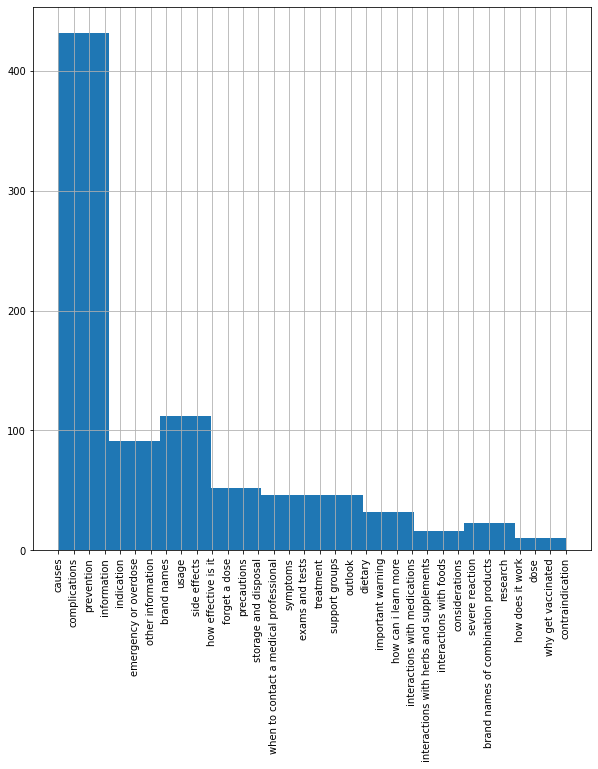

In [42]:
plt.figure(figsize=[10,10]);
df['Qtype'].hist();
plt.xticks(rotation = 90);

### What are the top 10 frequent question type asked?

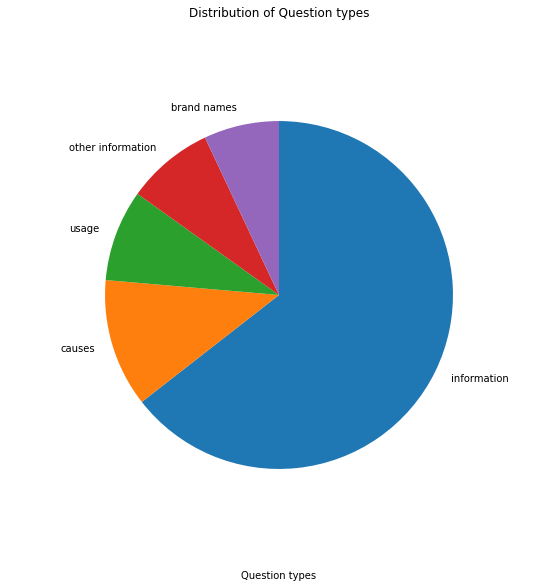

In [22]:
plt.figure(figsize=[10,10])
sorted_counts = df['Qtype'].value_counts().head()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False,radius=0.8);
#top_Qtype=df['Qtype'].value_counts().head(10).plot(kind='bar',alpha=0.5,color='blue')
plt.title('Distribution of Question types')
plt.xlabel('Question types')
plt.show()


In [23]:
list(df['Qtype'].value_counts()[:10].keys())

['information',
 'causes',
 'usage',
 'other information',
 'brand names',
 'side effects',
 'forget a dose',
 'treatment',
 'indication',
 'prevention']

Top 10 question types are: `['information',
 'causes',
 'usage',
 'other information',
 'brand names',
 'side effects',
 'forget a dose',
 'treatment',
 'indication',
 'prevention']`



In [43]:
df['Focus'].nunique()

311

###What are the top 10 frequent question focus?

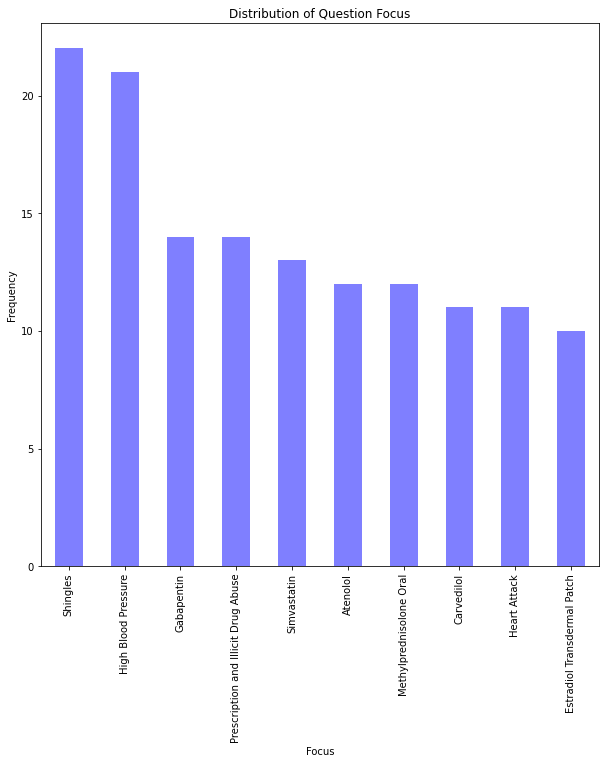

In [25]:
plt.figure(figsize=[10,10])
top_Qtype=df['Focus'].value_counts().head(10).plot(kind='bar',alpha=0.5,color='blue')
plt.title('Distribution of Question Focus')
plt.xlabel('Focus')
plt.ylabel('Frequency')
plt.show()

In [45]:
list(df['Focus'].value_counts()[:10].keys())

['Shingles',
 'High Blood Pressure',
 'Gabapentin',
 'Prescription and Illicit Drug Abuse',
 'Simvastatin',
 'Atenolol',
 'Methylprednisolone Oral',
 'Carvedilol',
 'Heart Attack',
 'Estradiol Transdermal Patch']

Top 10 question focus are: `['Shingles',
 'High Blood Pressure',
 'Gabapentin',
 'Prescription and Illicit Drug Abuse',
 'Simvastatin',
 'Atenolol',
 'Methylprednisolone Oral',
 'Carvedilol',
 'Heart Attack',
 'Estradiol Transdermal Patch']`
 

### What are the question types regarding the top 3 focus?

In [47]:
df_qf=df[(df['Focus']=='Shingles') | (df['Focus']=='High Blood Pressure') | (df['Focus']=='Gabapentin')]
df_qf


,Q_num,Question,Answer,Focus,Qtype,Rank,URL
227,32.0,What causes High Blood Pressure ?,"Changes, either fromgenesor the environment, i...",High Blood Pressure,causes,1-Incorrect,http://www.nhlbi.nih.gov/health/health-topics/...
229,32.0,What causes High Blood Pressure ?,Changes in Body Functions Researchers continue...,High Blood Pressure,causes,1-Incorrect,http://nihseniorhealth.gov/highbloodpressure/t...
254,33.0,What is (are) Shingles ?,"""A burning, tingly feeling is what I noticed f...",Shingles,information,2-Related,http://nihseniorhealth.gov/shingles/toc.html
255,33.0,What is (are) Shingles ?,Shingles is a painful rash that develops on on...,Shingles,information,2-Related,http://nihseniorhealth.gov/shingles/toc.html
256,33.0,What is (are) Shingles ?,Shingles (herpes zoster) is an outbreak of ras...,Shingles,information,2-Related,http://www.ninds.nih.gov/disorders/shingles/sh...
284,37.0,How to prevent Shingles ?,"Yes. In May 2006, the U.S. Food and Drug Admin...",Shingles,prevention,2-Related,http://nihseniorhealth.gov/shingles/toc.html
285,37.0,What causes Shingles ?,Caused By A Virus Shingles is caused by a viru...,Shingles,causes,2-Related,http://nihseniorhealth.gov/shingles/toc.html
286,37.0,What causes Shingles ?,Shingles is caused by a virus called the varic...,Shingles,causes,3-Incomplete,http://nihseniorhealth.gov/shingles/toc.html
287,37.0,What is (are) Shingles ?,"""A burning, tingly feeling is what I noticed f...",Shingles,information,3-Incomplete,http://nihseniorhealth.gov/shingles/toc.html
288,37.0,What is (are) Shingles ?,Shingles -- also called varicella-zoster -- is...,Shingles,information,3-Incomplete,http://nihseniorhealth.gov/shingles/toc.html


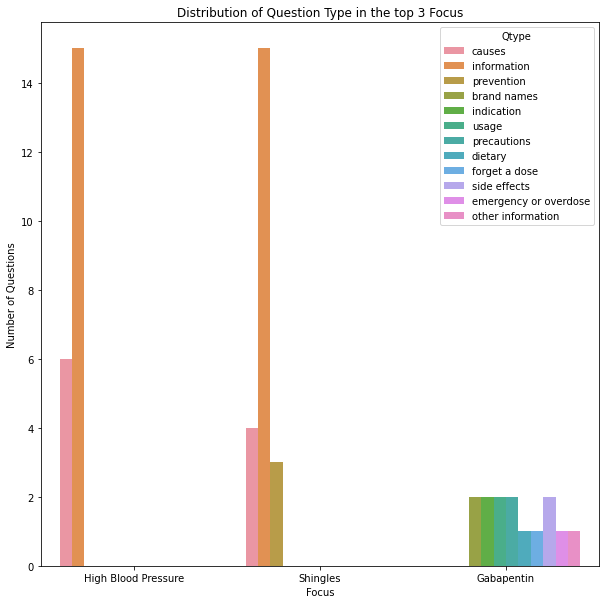

In [48]:
plt.figure(figsize=[10,10])
sb.countplot(data = df_qf, x = 'Focus', hue = 'Qtype') 
plt.title('Distribution of Question Type in the top 3 Focus');
plt.xlabel('Focus');
plt.ylabel ('Number of Questions');


The highest concern for people regarding the top 2 asked focus `['Shingles', 'High Blood Pressure']` is information, but as for `['Gabapentin']` it has several question types like `['brand names', 'indication', 'usage', 'precautions', 'dietary']`, etc.

### What are the top 3 question types and the least one asked regarding the top focus 'Breast Cancer' ?




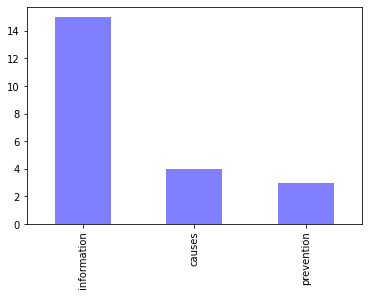

In [49]:
df[df['Focus']=='Shingles']['Qtype'].value_counts().plot(kind='bar',alpha=0.5,color='blue');

The most asked question types regarding `Shingles`is **information** , followed by **causes** then **prevention** as the least question type about that disease